## <p style="text-align: right;"> &#9989; Haoyan Lin</p>

# CMSE 202 Midterm (Section 001 - Spring 2020)

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll practice setting up a GitHub repository, committing and pushing repository changes, downloading data with command line tools, writing a python class, and using a new-to-you Python package. You should find that you have all of the skills necessary to complete this exam with even just eight weeks of CMSE 202 under your belt!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, try doing Parts 1 and 2 first so that you have your repository set up and you download the provided data files as they will be necessary to complete the assigned tasks. Let your instructor know right away if you have problems downloading the data!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**Keep your eye on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Setting up a repository for tracking changes (15 points)

Before you get too far along in the assignment, you need to set up a **private** GitHub repository that you will store this notebook in and track the changes as you make them. For this section you should:

1. Set up a new **private** Git repository on GitHub.
2. Clone the repository onto your computer.
3. Move this notebook into that repository and then add it and commit it to the repository and push the changes to the remote repository (**Suggestion**: You may want save and close this notebook before you move to the repository and then reopen it after you move it to make sure that you're working with the right copy of the notebook.)
4. Add your instructor as a Collaborator to your respository. As a reminder, your instructor and TA's usernames are: "yangy5" and "nchamusah14" respectivey.

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up, you can always just work on the notebook as is and try to come back and figure out the repository component later. You may lose some points though since you won't have periodic commits as you make progress along the way, but it will be better than not working on the other parts of the exam!

---
## Part 2: Data Loading and Quadratic Regression (40 points)

The goal in this part is to build a *quadratic regression* model that predicts a person's weight based on the height. We have learned linear regression in this course, that is to find the equation of a *line* that best fits a set of data. In contrast, a quadratic regression is the process of finding the equation of a *parabola* that best fits the data (for details, read https://www.varsitytutors.com/hotmath/hotmath_help/topics/quadratic-regression). The dataset we will explore consists of the heights and weights of 100 people. 

**Question 2.1: (5 points)** Load the file "WeightHeight.csv" and display it as a data frame.

In [18]:
### Put your code here ###
import pandas as pd
import numpy as np

height, weight = np.loadtxt("WeightHeight.csv", usecols = (0,1), unpack=True, skiprows = 1, delimiter=',')


We will take the first 80 samples of height-weight pairs as the training data to build the model, and will take the last 20 samples of height-weight pairs as the testing data to validate the accuracy of the model.

**Question 2.2 (10 points):** Create the following 4 *Numpy arrays* out of the data frame:

(1) *training_height*: consisting of the first 80 heights in the column "Height";

(2) *testing_height*: consisting of the last 20 heights in the column "Height";

(3) *training_weight*: consisting of the first 80 weights in the column "Weight";

(4) *testing_weight*: consisting of the last 20 weights in the column "Weight".

In [22]:
### Put your code here ###
training_height = height[0:80]
testing_height = height[-20:]
training_weight = weight[0:80]
testing_weight = weight[-20:]


**Question 2.3: (5 points)** Draw the scatter plot with *training_height* as the horizontal $x$-axis and *training_weight* as the vertical $y$-axis.

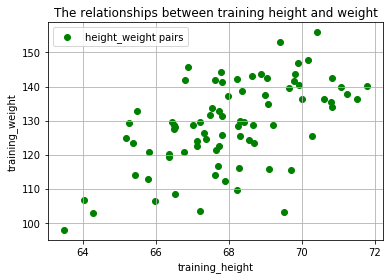

In [24]:
### Put your code here ###
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(training_height,training_weight, color = 'green', label = 'height_weight pairs' )
plt.xlabel('training_height')
plt.ylabel('training_weight')
plt.title('The relationships between training height and weight')
plt.grid()
plt.legend()

**Question 2.4: (10 points)** Implement quadratic regression with *training_height* (as the $x$ variable) and *training_weight* (as the $y$ variable). Plot the parabola over the scatter plot in **Question 2.3**.

**Hint:** search online to find a function in Python that can implement quadratic regression.


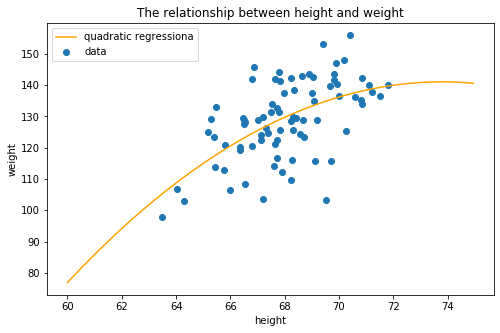

In [36]:


x_model = np.arange(60, 75, 0.05)

parameters = np.polyfit(training_height, training_weight, 2)
function = np.poly1d(parameters)
y_model = function(x_model)

plt.figure(figsize=(8,5))
plt.scatter(training_height, training_weight, label = "data")
plt.plot(x_model, y_model, color = "orange", label = 'quadratic regressiona')



plt.title("The relationship between height and weight")
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

Recall the mean-squared error (MSE) of a data set with $n$ samples $(x_1,y_1)$, $\dots$, $(x_n,y_n)$, is defined as
$$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - y_{predicted}(x_i))}^{2} $$

**Question 2.5 (10 points):** Write *for* loops to manually compute the MSEs on both the training data (i.e., *training_height* and *training_weight*) and the testing data (i.e., *testing_height* and *testing_weight*). Here the predicted weights should be computed by the quadratic regression model. 

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 2".
---

---
## Part 3: Polynomial Regression (25 points)

A polynomial regression is the process of finding the equation of a polynomial that best fits a set of data (https://en.wikipedia.org/wiki/Polynomial_regression). In particular, linear regression is a polynomial regression with polynomials of degree 1; quadratic regression is a polynomial regression with polynomials of degree 2. In this part, we study general polynomial regression.

The package *Numpy* has built-in functions to perform polynomial regression. Fortunately, *Numpy* has been included in the Anaconda distribution.  

**Question 3.1 (5 points):** Suppose *Numpy* were not included in Anaconda and you would like to install this package using *pip* in the command line interface. Write down the full command to do this task.

<font size=8 color="#009600">&#9998;</font> pip install --user "Anaconda"

Find the built-in function in *Numpy* to implement polynomial regression. Read the documentation to understand what the input and output mean and how to apply it.

**3.2 Question: (10 points)** Implement cubic regression, that is, polynomial regression with polynomials of degree 3, with *training_height* (as the $x$ variable) and *training_weight* (as the $y$ variable). Plot the cubic curve over the scatter plot.

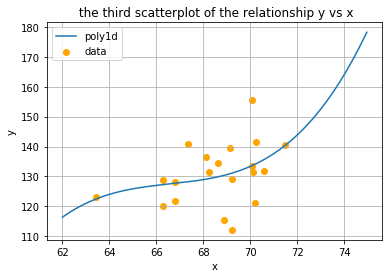

In [76]:

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression

parameters = np.polyfit(testing_height,testing_weight, 3)
func = np.poly1d(parameters)

x_new = np.arange(62, 75, 0.05)
y_new  = func(x_new)
plt.scatter (testing_height, testing_weight, c = 'orange', label = 'data')
plt.plot(x_new, y_new, label = 'poly1d')
plt.xlabel('x')
plt.xlabel('x')
plt.ylabel('y')
plt.title(' the third scatterplot of the relationship y vs x')
plt.grid()
plt.legend()

**Question 3.3: (5 points)** Write *for* loops to manually compute the MSEs of cubic regression on both the training data (i.e., *training_height* and *training_weight*) and the testing data (i.e., *testing_height* and *testing_weight*). Here the predicted weights are computed by your cubic regression model.

In [78]:
### Put your code here ###


**Question 3.4: (5 points)** Compare the MSEs in **Question 2.5** and **Question 3.3**. Which regression model do you think is better for this data set? Explain your criteria.

<font size=8 color="#009600">&#9998;</font> There are two trends in this dataset over the time range spanned by the data. In short run, the global mean levels going up. However, the overall of the data is going up quickly and then going up slowly. So, I choose the 2 as polynomial, which is the best choice to match the dataframe because the overall trend looks like a line upward trend with inceasing speed.


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 3".
---

## Part 4: Writing a simple Python class (20 points)

Suppose a class has 50 students and each student takes three subjects: art, science, and physical education (PE). 


**Question 4.1 (10 points):** Write a class named "Student". The class has 5 attributes: "name" (type: string), "art" (type: integer), "science" (type: integer), "pe" (type: integer), and "total" (type: integer). The class has 2 methods: "init" and "get_info". The "init" method assigns three random integers between 50 and 100 (including 50 and 100) to the attributes "art", "science" and "pe", respectively. The "init" method also assigns the sum of these three integers to the attribute "total". The "get_info" method prints to the screen the student's scores of art, science, PE, and the total score.

In [61]:
### Put your code here ###
class Student():
    def __init__(self, name = ''):
        self.name = name
        self.art = np.random.randint(50,101)
        self.pe = np.random.randint(50,101)
        self.science = np.random.randint(50,101)
        self.total = self.art + self.pe + self.science
    def get_info(self):
        print("art " , self.art)     
        print("science " ,self.science) 
        print("pe  " , self.pe)
        print('total ' , self.total)
        
     

**Question 4.2 (10 points):** Write a *for* loop to create 50 instances of the class "Student". Set their "name" attributes as "Student0, Student1, ..., Student49", respective. Rank the students based on their total scores of the three subjects from the highest to the lowest. If two students have equal totals, the one with smaller name index comes first, that is, Student$i$ comes before Student$j$ if $i<j$.

In [64]:
### Put your code here ###
lis = []
for i in range(50):
    all_student = Student('student'+str(i))
all_student

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 4".
---

## You're done! Congrats on finishing your CMSE 202 Midterm!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.